In [1]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_folders_directory = 'drive/MyDrive/data/train/'
import os
print(os.listdir(train_folders_directory))

['close', 'open']


In [4]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=7
)

valid_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=7
)

Found 12000 images belonging to 2 classes.
Found 2998 images belonging to 2 classes.


In [14]:
def LeNet5():
  LeNet5 = Sequential()
  LeNet5.add(Conv2D(6, (5, 5), activation="relu", input_shape=(32,32,1)))
  LeNet5.add(MaxPooling2D(2, 2))
  LeNet5.add(Conv2D(16, (5, 5), activation="relu"))
  LeNet5.add(MaxPooling2D(2, 2))
  LeNet5.add(Flatten())
  LeNet5.add(Dense(120, activation="relu"))
  LeNet5.add(Dropout(0.25))
  LeNet5.add(Dense(84, activation="relu"))
  LeNet5.add(Dropout(0.25))
  LeNet5.add(Dense(2, activation="softmax"))
  LeNet5.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
  return LeNet5

In [15]:
LeNet5_model = LeNet5()
LeNet5_history = LeNet5_model.fit(train_generator, epochs=50, validation_data=valid_generator, shuffle=True, validation_steps=len(valid_generator),batch_size=32)

Epoch 1/50
94/94 [==============================] - 1668s 18s/step - loss: 0.4943 - accuracy: 0.7806 - val_loss: 0.7459 - val_accuracy: 0.6734
Epoch 2/50
94/94 [==============================] - 28s 302ms/step - loss: 0.3032 - accuracy: 0.8813 - val_loss: 0.5711 - val_accuracy: 0.7495
Epoch 3/50
94/94 [==============================] - 28s 298ms/step - loss: 0.2145 - accuracy: 0.9212 - val_loss: 0.4290 - val_accuracy: 0.8159
Epoch 4/50
94/94 [==============================] - 28s 298ms/step - loss: 0.1669 - accuracy: 0.9380 - val_loss: 0.3767 - val_accuracy: 0.8492
Epoch 5/50
94/94 [==============================] - 28s 300ms/step - loss: 0.1393 - accuracy: 0.9463 - val_loss: 0.3070 - val_accuracy: 0.8759
Epoch 6/50
94/94 [==============================] - 28s 298ms/step - loss: 0.1157 - accuracy: 0.9567 - val_loss: 0.2968 - val_accuracy: 0.8916
Epoch 7/50
94/94 [==============================] - 28s 303ms/step - loss: 0.1042 - accuracy: 0.9621 - val_loss: 0.2816 - val_accuracy: 0.8939

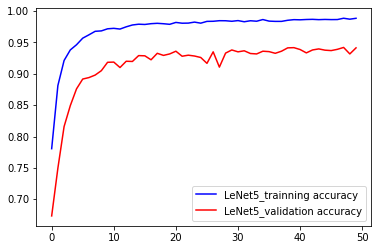

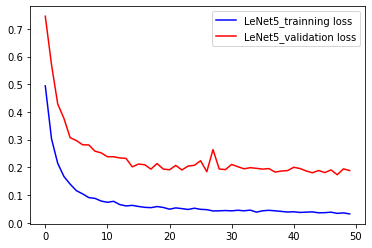

In [16]:
LeNet5_accuracy = LeNet5_history.history['accuracy']
LeNet5_val_accuracy = LeNet5_history.history['val_accuracy']
LeNet5_loss = LeNet5_history.history['loss']
LeNet5_val_loss = LeNet5_history.history['val_loss']
LeNet5_epochs = range(50)

plt.plot(LeNet5_epochs, LeNet5_accuracy, "b", label="LeNet5_trainning accuracy")
plt.plot(LeNet5_epochs, LeNet5_val_accuracy, "r", label="LeNet5_validation accuracy")
plt.legend()
plt.show()

plt.plot(LeNet5_epochs, LeNet5_loss, "b", label="LeNet5_trainning loss")
plt.plot(LeNet5_epochs, LeNet5_val_loss, "r", label="LeNet5_validation loss")
plt.legend()
plt.show()

In [18]:
LeNet5_model.save("drive/MyDrive/LeNet5.h5")
LeNet5_model.save("drive/MyDrive/LeNet5.model")